## Data Structure



### Combine the tar files

After downloading the files from onedrive one can combine them using 

cat hr5_metal.a* | tar xzvf -


### cluster particle data

The data of the Horizon run 5 simulation for our study has been split into various "clusters{snap}.hdf5" files where {snap} indicates the snapshot number of simulation. For example, the last snapshot at redshift of 0.625 is 296 for which the file name would be clusters296.hdf5. 

### cluster merger files

These are *_MAH.csv files containing the snapshot number and cluster id of the cluster at that snapshot.
It contains 8 columns, the following are of interest for the study: 

- time: Lookback time in Gyr
- snap: snapshot number of simulation
- HostHaloID: HostHaloID of the cluster at that snapshot
- ClusMass(Msun): Mass of the cluster at that epoch in solar mass.
- Massfraction: fraction of the final mass at that epoch


## Data containers 

The <a>params.ini</a> sets the paths. Set the path of <b>outdir</b> to the location of hdf5 files.

You can make the use of HR5_module.py to make the analysis. It contains the functions and classes used to perform the analysis.
In the following we will see the functions available for analysis.

In [5]:
# import the modules
import HR5_cluster as hr5
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 

In [6]:
# Get all the IDs of clusters present at the given snapshot
snapshot=296

# Let s define the instance of the class Cluster with the snapshot
clus296 = pd.read_csv('../Data/groups5e13.csv')

clus296.columns

Index(['HostHaloID', 'HostMtot(Msun)'], dtype='object')

In [7]:
# These are the list IDs of the clusters
cluslist = clus296['HostHaloID'].tolist()
print(cluslist)
# Lets pick 10th cluster in the list
clusid = 1664541#cluslist[10]


[1561636, 1581385, 1664541, 1758257, 1808858, 1827559, 1847383, 1954735, 1983863, 2002628, 2013898, 2071135, 2199507, 2227715, 2246014, 2290169, 2290206, 2507502, 2592446, 2623756, 2734822, 2885792, 2892837, 2937863, 2944981, 3016893, 3069850, 3094112, 3178107, 3200641, 3226680, 3259117, 3284456, 3355500, 3359016, 3540174, 3651767, 3672299, 3689051, 3700933, 3744183, 3748260, 3780410, 3811219, 3882383, 3889787, 3929760, 3929767, 3929805, 3933724, 3945090, 4040811, 4063505, 4068321, 4081915, 4083100, 4147752, 4195553, 4226110, 4289749, 4309863, 4328263, 4415004, 4465008, 4465020, 4477204, 4481843, 4481851, 4549606, 4560890, 4617549, 4622511, 4658833, 4658856, 4714730, 4827650, 4838809, 4899516, 4901245, 4921745, 4966761, 4968706, 5011121, 5028157, 5033760, 5044774, 5049205, 5208836, 5259095, 5265012, 5332403, 5358495, 5375604, 5409575, 5462023, 5493185, 5520106, 5548455, 5573913, 5634590, 5638753, 5699819, 5715147, 5753402, 5816171, 5871163, 5884858, 5957816, 5960768, 5979633, 6143068, 

In [8]:
# Initialize the class instance with the given `snapno` and `clusno`
# The instance will contain all the information of the cluster and functions for further # processing
clus = hr5.Cluster(snapshot,clusid)


In [9]:
# list all the functions and variables for the clus instance by dir(clus)
# the items with  __  are private and can t be accessed, others are public
# we get only public attributes

# Get the list of all attributes and functions of the clus object
all_attributes = dir(clus)

# Filter the list to only include public attributes and functions
public_attributes = [attr for attr in all_attributes if not attr.startswith( '_' )]

# Print the resulting list of public attributes and functions
print(public_attributes)


['bcgid', 'clusID', 'clus_mdm', 'clus_mgas', 'clus_msink', 'clus_mstar', 'clus_mtot', 'clus_nsink', 'clus_nstar', 'clus_nsub', 'clus_pos', 'clus_vel', 'f', 'get_all_parts', 'get_alldat_gal', 'get_galids', 'save_yt_dataset', 'snap']


In [10]:
clus.bcgid

'1721217'

Attributes are the functions and variables that can be accessed using clus.{attribute_name} where {attribute_name} is the 
name of the attribute. We explain all the varible and functions:

- bcgid: galaxy id of the most massive galaxy
- clusID: cluster id at the snapshot
- clus_mdm: total dark matter mass of the cluster
- clus_mgas: total gas mass of the cluster
- clus_msink: total sink particle mass of cluster 
- clus_mstar: total stellar mass of cluster
- clus_mtot: total mass of the cluster
- clus_ngas: total number of gas particles in cluster 
- clus_nsink: total number of sink particles in cluster
- clus_nstar: total number of star particles in cluster
- clus_nsub: total number of subhalos (galaxies) cluster
- clus_pos: position of cluster in cMpc/h in the simulation
- clus_vel: velocity of the cluster in km/s 
- f: excess to the raw hdf5 file
- get_all_parts: function to get all particles of a type in cluster
- get_alldat_gal: get all data for a galaxy
- get_galids: get all galaxy ids in a cluster
- save_yt_dataset: get yt dataset for a cluster
- snap: snapshot number 

In [11]:
# You can also get explaination of the attributes and functions using ? or ??
clus.get_galids?


Signature: clus.get_galids()
Docstring:
Returns a list of galaxy IDs from the `self.f` dictionary that corresponds to the cluster with ID `self.clusID`.

:return: A list of galaxy IDs.
File:      ~/hr5_metallicity/Code/HR5_cluster.py
Type:      method


In [12]:
# Get all ids galaxies in the cluster

gal_list = clus.get_galids()

# print first 10
print(gal_list[:10])



['1721213', '1721214', '1721215', '1721216', '1721217', '1721218', '1721219', '1721220', '1721221', '1721222']


In [13]:
# get all particles of type 'star' in the cluster we can use get_all_parts

clus.get_all_parts?

Signature: clus.get_all_parts(partype)
Docstring:
This function returns an instance of the Galaxy class containing all parts of the specified type.

Args:
    partype (str): The type of part to retrieve.

Returns:
    Galaxy: An instance of the Galaxy class containing all parts of the specified type.
File:      ~/hr5_metallicity/Code/HR5_cluster.py
Type:      method


In [14]:
# get all stellar particles it returns a Galaxy object but this only contains
# the sttributes for stellar particles and others are empty

stars = clus.get_all_parts('star')

Processing galaxy ICL1298

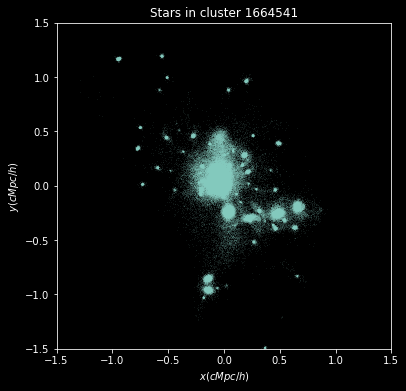

In [15]:
# We can plot these stars

star_pos = stars.star_pos_com

fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.set_xlabel(r'$x(cMpc/h)$')
ax.set_ylabel(r'$y(cMpc/h)$')
ax.scatter(star_pos[:,0],star_pos[:,1],s=0.001)
ax.set_title(f"Stars in cluster {clusid}")
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)

plt.show()

In [16]:
# we can use function get_allgal_data to get all the data of the galaxies in the cluster
# let's see the inputs

clus.get_alldat_gal?

Signature: clus.get_alldat_gal(galist)
Docstring:
This function takes in a list of galaxy IDs or a single galaxy ID and returns a Galaxy object or a list of Galaxy objects respectively. 

Args:
- galist (list or int): A list of galaxy IDs or a single galaxy ID.

Returns:
- outgal (list): A list of Galaxy objects if galist is a list.
- gal (Galaxy object): A Galaxy object if galist is an int.
File:      ~/hr5_metallicity/Code/HR5_cluster.py
Type:      method


In [17]:
# Lets choose galaxy no 1 from the gal_list and run the function

galid = gal_list[0]

gal = clus.get_alldat_gal(galid)

Processing galaxy 1721213

In [18]:
# gal is a Galaxy object that has it's own attributes
# lets see the attributes

# Get the list of all attributes and functions of the gal object
all_attributes = dir(gal)

# Filter the list to only include public attributes and functions
public_attributes = [attr for attr in all_attributes if not attr.startswith( '_' )]

# Print the resulting list of public attributes and functions
print(public_attributes)

['bcgid', 'clusID', 'clus_mdm', 'clus_mgas', 'clus_msink', 'clus_mstar', 'clus_mtot', 'clus_nsink', 'clus_nstar', 'clus_nsub', 'clus_pos', 'clus_vel', 'dm_mass', 'dm_pos', 'dm_pos_com', 'dm_vel', 'f', 'galID', 'gal_mdm', 'gal_mgas', 'gal_msink', 'gal_mstar', 'gal_mtot', 'gal_ngas', 'gal_nsink', 'gal_nstar', 'gal_pos', 'gal_vel', 'gas_fe', 'gas_h', 'gas_mass', 'gas_o', 'gas_pos', 'gas_pos_com', 'gas_t', 'gas_vel', 'gas_z', 'get_all_parts', 'get_alldat_gal', 'get_galids', 'rcom_dm', 'rcom_gas', 'rcom_star', 'save_yt_dataset', 'snap', 'star_mass', 'star_pos', 'star_pos_com', 'star_vel', 'star_z']


Galaxy object takes it's inheritense from the Cluster class therefore contains all the parameters available for Class 
are available plus extra few. We explain them below:
**Note all masses are in Msun/h and positions are in cMpc/h**

- dm_mass: array of dark matter mass : size (gal_ndm)
- dm_pos: array of dark matter position size: (gal_ndm,3)
- dm_pos_com: array of dark matter position in center of mass size: (gal_ndm,3)
- dm_vel: array of dark matter velocity size: (gal_ndm,3)
- galID: galaxy ID
- gal_mdm: total dark matter mass of galaxy
- gal_mgas: total gas mass of galaxy
- gal_msink: total sink mass of galaxy
- gal_mstar: total stellar mass of galaxy
- gal_mtot: total mass of galaxy
- gal_ngas: total number of gas particles in galaxy
- gal_nsink: total number of sink particles in galaxy
- gal_nstar: total number of stellar particles in galaxy
- gal_pos: galaxy position (cMpc/h) size: 3
- gal_vel: array of gas particle velocity size: 3
- gas_fe: array of fe size: (gal_ngas)
- gas_h: array of h size: (gal_ngas)
- gas_mass: array of gas particle mass : size (gal_gas)
- gas_o: array of o size: (gal_ngas)
- gas_pos: array of gas particle position (cMpc/h) size: (gal_ngas,3)
- gas_pos_com: array of gas particle position in center of mass (cMpc/h) size: (gal_ngas,3)
- gas_t: array of gas temperature size: (gal_ngas)
- gas_vel: array of gas particle velocity size: (gal_ngas,3)
- gas_z: array of gas metallicity size: (gal_ngas)
- rcom_dm: array of dark matter particle distances (cMpc/h) from origin in COM frame: (gal_ndm)
- rcom_gas: array of gas particle distances (cMpc/h) from origin in COM frame: (gal_ngas)
- rcom_star: array of stellar particle distances from origin in COM frame (cMpc/h): (gal_nstar)
- star_mass: array of stellar particle mass: (gal_nstar)
- star_pos: array of stellar particle position (cMpc/h) size: (gal_nstar,3)
- star_pos_com: array of stellar particle position in COM frame (cMpc/h) size: (gal_nstar,3)
- star_vel: array of stellar particle velocity size: (gal_nstar,3)
- star_z: array of stellar particle metallicty size: (gal_nstar)


In [19]:
# You can also choose a list of galaxies and run the function
# lets choose first 5 galaxies from gal_list
galxs = gal_list[:5]

galout = clus.get_alldat_gal(galxs)

Processing galaxy 1721214

Processing galaxy 1721217

In [20]:
# galout now contains the list of galaxy object which contains the
# the all the attributes above

galout

In [21]:
# To get for example the position of dark matter in COM frame
# for galaxy 2087002 (gal) defined above this is a array of size (ndm,3)
dmcom = gal.dm_pos_com

print(dmcom.shape)

(571, 3)


Processing galaxy 2634391

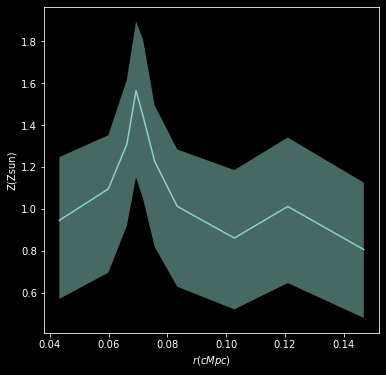

In [34]:
# We can also make simple profile plots of stellar metallicity 
# For example for BCG galaxy of this cluster we show below


def Binned_histogram(data,propx,propy,nb):
    """
    This function returns the binned median and quartiles of the data
    """

    ser, bins = pd.qcut(data[propx],nb,retbins=True, labels=False,duplicates='drop')
    labels = [int(i) for i in range(len(bins)-1)]
    data['binned'] = pd.cut(data[propx], bins,labels=labels,duplicates='drop')

    Q1 = []
    Q2 = []
    qua1 = []
    qua2 = []

    j=0
    for lab in labels:
        
        Q1.append(data.loc[data['binned']==lab,propx].median())
        Q2.append(data.loc[data['binned']==lab,propy].median())    

        # first and third quartile
        qua1.append(data.loc[data['binned']==lab,propy].quantile(0.25))
        qua2.append(data.loc[data['binned']==lab,propy].quantile(0.75))

        
    return Q1,Q2,qua1,qua2

# get the poisiton in COM frame of BCG galaxy
bcg_galaxy = clus.get_alldat_gal(clus.bcgid)
star_pos_gal = bcg_galaxy.star_pos-bcg_galaxy.gal_pos
rgal_star = np.linalg.norm(star_pos_gal,axis=1)

# Create a dataframe of pandas for analysis
BCG_data = pd.DataFrame({'rcom':rgal_star,'star_z':bcg_galaxy.star_z[:]/0.02})


q1,q2,Q1,Q2 = Binned_histogram(BCG_data,'rcom','star_z',10)

fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.set_xlabel(r'$r(cMpc)$')
ax.set_ylabel(r'Z(Zsun)')
ax.plot(q1,q2)
ax.fill_between(q1,Q1,Q2,alpha=0.5)


In [23]:
bcg_galaxy.gal_pos

array([841.79233927, 510.8943196 , 487.13519842])

## YT dataset

The Module also allows us to get the data for the cluster in the <b>YT package</b> dataset.
[YT Project](https://yt-project.org/) is used for analysis of simulations and has a variety of functions that are readily available. The dataset is saved as generic particle dataset.


In [24]:
clus.save_yt_dataset?

Signature: clus.save_yt_dataset(clusID)
Docstring:
Saves the yt dataset of the BCG, ICM, and rest of the galaxies.

Parameters:
-----------
clusID: int
    Unique identifier of the cluster.


Returns:
--------
ds_all: yt dataset
    Dataset containing all the particles.
ds_rest: yt dataset
    Dataset containing the rest of the galaxies particles.
ds_bcg: yt dataset
    Dataset containing the BCG particles.
ds_icm: yt dataset
    Dataset containing the ICM particles.
File:      ~/hr5_metallicity/Code/HR5_cluster.py
Type:      method


In [25]:
cluster=1664541
snapshot=296

clus = hr5.Cluster(snapshot,cluster)



#ds_all,ds_rest,ds_bcg,ds_icm = clus.save_yt_dataset(snapshot)
ids = clus.get_galids()
ids.remove('ICL')
gal = clus.get_alldat_gal(ids)



Processing galaxy 1721214

Processing galaxy 1721298

In [26]:
gal[-1].star_pos_com

array([[-0.93586123,  1.16996888,  0.43485614],
       [-0.938417  ,  1.16705621,  0.4330206 ],
       [-0.93877657,  1.16101403,  0.42594161],
       ...,
       [-0.96983395,  1.1697722 ,  0.42671147],
       [-0.97112636,  1.17503864,  0.44242952],
       [-0.97126751,  1.17361706,  0.44354507]])

In [27]:
ds_all,ds_rest,ds_bcg,ds_icm = clus.save_yt_dataset(cluster)

Processing galaxy 1721217

Processing galaxy ICL1298(1924503,) (1924503,)


yt : [INFO     ] 2024-08-12 13:39:11,540 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-08-12 13:39:11,541 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2024-08-12 13:39:11,543 Parameters: domain_left_edge          = [-2. -2. -2.]
yt : [INFO     ] 2024-08-12 13:39:11,544 Parameters: domain_right_edge         = [2. 2. 2.]
yt : [INFO     ] 2024-08-12 13:39:11,545 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2024-08-12 13:39:11,549 Allocating for 3.401e+06 particles (index particle type 'all')
yt : [INFO     ] 2024-08-12 13:39:12,709 Identified 2.364e+05 octs
yt : [INFO     ] 2024-08-12 13:39:13,141 xlim = -2.000000 2.000000
yt : [INFO     ] 2024-08-12 13:39:13,142 ylim = -2.000000 2.000000
yt : [INFO     ] 2024-08-12 13:39:13,143 xlim = -2.000000 2.000000
yt : [INFO     ] 2024-08-12 13:39:13,144 ylim = -2.000000 2.000000
yt : [INFO     ] 2024-08-12 13:39:13,145 Splatting (('star', 'particle_mass')) onto a 800 by 800 mesh


<yt.visualization.particle_plots.ParticleProjectionPlot object at 0x145aa3f1f390> 2


yt : [INFO     ] 2024-08-12 13:39:14,103 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-08-12 13:39:14,104 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2024-08-12 13:39:14,105 Parameters: domain_left_edge          = [-2. -2. -2.]
yt : [INFO     ] 2024-08-12 13:39:14,106 Parameters: domain_right_edge         = [2. 2. 2.]
yt : [INFO     ] 2024-08-12 13:39:14,106 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2024-08-12 13:39:14,110 Allocating for 3.401e+06 particles (index particle type 'all')
yt : [INFO     ] 2024-08-12 13:39:15,871 Identified 2.364e+05 octs
yt : [INFO     ] 2024-08-12 13:39:16,248 xlim = -2.000000 2.000000
yt : [INFO     ] 2024-08-12 13:39:16,249 ylim = -2.000000 2.000000
yt : [INFO     ] 2024-08-12 13:39:16,251 xlim = -2.000000 2.000000
yt : [INFO     ] 2024-08-12 13:39:16,251 ylim = -2.000000 2.000000
yt : [INFO     ] 2024-08-12 13:39:16,253 Splatting (('star', 'particle_mass')) onto a 800 by 800 mesh
yt : [INFO   

Full details of all the capabilities of yt are given here [plotting with yt](https://yt-project.org/doc/visualizing/plots.html)

Just to do a demonstration we plot a projection plot of stellar paticle mass



In [28]:
import yt 

prj = yt.ParticleProjectionPlot(ds_icm,'x',("star","particle_mass"))

prj.set_unit(("star","particle_mass"), "Msun")

prj.save('../Plots/Projection_stellar_mass.png')

yt : [INFO     ] 2024-08-12 13:39:18,025 Allocating for 2.330e+05 particles (index particle type 'all')
yt : [INFO     ] 2024-08-12 13:39:18,078 Identified 1.718e+04 octs
yt : [INFO     ] 2024-08-12 13:39:18,641 xlim = -2.000000 2.000000
yt : [INFO     ] 2024-08-12 13:39:18,642 ylim = -2.000000 2.000000
yt : [INFO     ] 2024-08-12 13:39:18,644 xlim = -2.000000 2.000000
yt : [INFO     ] 2024-08-12 13:39:18,645 ylim = -2.000000 2.000000
yt : [INFO     ] 2024-08-12 13:39:18,646 Splatting (('star', 'particle_mass')) onto a 800 by 800 mesh
yt : [INFO     ] 2024-08-12 13:39:19,272 Saving plot ../Plots/Projection_stellar_mass.png
/home/ankitsingh/miniconda3/envs/ICL/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/home/ankitsingh/miniconda3/envs/ICL/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: Support for sett

['../Plots/Projection_stellar_mass.png']

## Time Evolution

To trace the time evolution of the cluster we track the host halo of BCG with redshift.
These values are written in the _MAH.txt files.


In [29]:
# Let analise the cluster id no. 2013898 shown above
import configparser
# load up the parameter file
parser = configparser.ConfigParser()
parser.read('../params.ini')


outdir = parser.get('Paths','outdir')

clus_evo = pd.read_csv(f'{outdir}/{clusid}_MAH.csv')

clus_evo.columns

Index(['time', 'snap', 'host_flag', 'flag_prog', 'HostHaloID', 'MainGalID',
       'ClusMass(Msun)', 'Massfraction'],
      dtype='object')

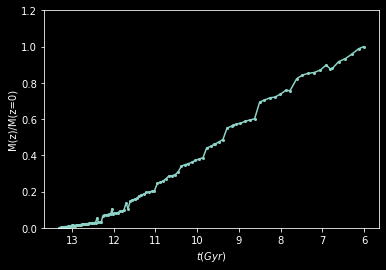

In [30]:
# plot the mass accretion history

fig,ax = plt.subplots(1,1)
ax.set_xlabel(r'$t(Gyr)$')
ax.set_ylabel(r'M(z)/M(z=0)') 
ax.plot(clus_evo['time'],clus_evo['Massfraction'],marker='o',markersize=2)
ax.set_ylim(0,1.2)
ax.invert_xaxis()
plt.show()


        time  snap  host_flag  flag_prog  HostHaloID  MainGalID  \
0   6.004000   296          1          2     1664541    1721217   
1   6.129012   285          1          2     1332082    1377950   
2   6.291831   271          1          2     1438507    1489293   
3   6.451776   257          1          2     1716207    1778452   
4   6.607541   243          1          2     7375084    7650468   
5   6.755192   229          1          2     1329599    1376618   
6   6.807411   224          1          2     1479533    1533122   
7   6.907687   219          1          2     1536493    1593549   
8   7.050688   212          1          2     5704150    5969708   
9   7.196239   205          1          2     1264987    1309656   
10  7.341389   198          1          2     1504699    1560526   
11  7.474394   192          1          2     2542202    2634391   
12  7.612411   185          1          2     1363993    1415249   
13  7.771810   177          1          2     2738677    284118

KeyError: "Unable to open object (object '1363993' doesn't exist)"

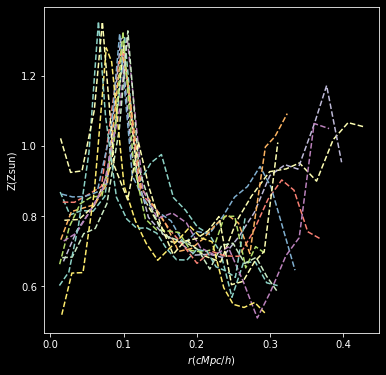

In [32]:

def Binned_histogram(data,propx,propy,nb):
    """
    This function returns the binned median and quartiles of the data
    """

    ser, bins = pd.cut(data[propx],nb,retbins=True, labels=False,duplicates='drop')
    labels = [int(i) for i in range(len(bins)-1)]
    data['binned'] = pd.cut(data[propx], bins,labels=labels,duplicates='drop')

    Q1 = []
    Q2 = []
    qua1 = []
    qua2 = []

    j=0
    for lab in labels:
        
        Q1.append(data.loc[data['binned']==lab,propx].median())
        Q2.append(data.loc[data['binned']==lab,propy].median())    

        # first and third quartile
        qua1.append(data.loc[data['binned']==lab,propy].quantile(0.25))
        qua2.append(data.loc[data['binned']==lab,propy].quantile(0.75))

        
    return Q1,Q2,qua1,qua2


fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.set_xlabel(r'$r(cMpc/h)$')
ax.set_ylabel(r'Z(Zsun)')


clus_last =  1664541

clus_half = pd.read_csv(f'{outdir}/halfmass.csv')
Timedat = pd.read_csv('../Data/Time_data.csv')

Red = clus_half.loc[clus_half['HostHaloID']==clus_last,'Redshift'].values[0]
half_snap = Timedat.loc[Timedat['Redshift']==Red,'Snapshot'].values[0]
MAHfile = pd.read_csv(f"{outdir}/{clus_last}_MAH.csv")
beyond_half = MAHfile[MAHfile['snap']>half_snap]

print(beyond_half)
for snap,clusid in zip(beyond_half['snap'].values,beyond_half['HostHaloID'].values):
    
    red = Timedat.loc[Timedat['Snapshot']==snap,'Redshift'].values[0]

    clus = hr5.Cluster(snap,clusid)
    # get the poisiton in COM frame of BCG galaxy
    bcg_galaxy = clus.get_alldat_gal(clus.bcgid)
    star_pos_gal = bcg_galaxy.star_pos[:]-bcg_galaxy.gal_pos[:]
    rgal_star = np.linalg.norm(star_pos_gal,axis=1)

    # Create a dataframe of pandas for analysis
    BCG_data = pd.DataFrame({'rcom':rgal_star,'star_z':bcg_galaxy.star_z[:]/0.02})


    q1,q2,_,_ = Binned_histogram(BCG_data,'rcom','star_z',20)

    ax.plot(q1,q2,linestyle='--',label=f'{red:.2f}')

    

ax.legend()


In [33]:
beyond_half[['snap','HostHaloID']]

,snap,HostHaloID
0,296,1664541
1,285,1332082
2,271,1438507
3,257,1716207
4,243,7375084
5,229,1329599
6,224,1479533
7,219,1536493
8,212,5704150
9,205,1264987


In [ ]:
import h5py

parser = configparser.ConfigParser()
parser.read('../params.ini')


outdir = parser.get('Paths','outdir')

snap=285
with h5py.File(f"{outdir}clusters{snap}.hdf5", "r") as f:

    print(len(list(f.keys())))


173


In [ ]:
clus.bcgid

'1721217'

In [ ]:
beyond_half

,time,snap,host_flag,flag_prog,HostHaloID,MainGalID,ClusMass(Msun),Massfraction
0,6.004000,296,1,2,1664541,1721217,6.590000e+13,1.000
1,6.129012,285,1,2,1332082,1377950,6.510000e+13,0.988
2,6.291831,271,1,2,1438507,1489293,6.311000e+13,0.958
3,6.451776,257,1,2,1716207,1778452,6.149000e+13,0.933
4,6.607541,243,1,2,7375084,7650468,6.042000e+13,0.917
5,6.755192,229,1,2,1329599,1376618,5.800000e+13,0.880
6,6.807411,224,1,2,1479533,1533122,5.782000e+13,0.877
7,6.907687,219,1,2,1536493,1593549,5.920000e+13,0.898
8,7.050688,212,1,2,5704150,5969708,5.735000e+13,0.870
9,7.196239,205,1,2,1264987,1309656,5.645000e+13,0.857


In [ ]:

import pandas as pd 
import configparser as par
import configparser
import HR5_cluster as hr5 
# load up the parameter file
parser = configparser.ConfigParser()
parser.read('../params.ini')

outdir = parser.get('Paths','outdir')

clus_last =  1808858

clus_half = pd.read_csv(f'{outdir}/halfmass.csv')
Timedat = pd.read_csv('../Data/Time_data.csv')

Red = clus_half.loc[clus_half['HostHaloID']==clus_last,'Redshift'].values[0]
half_snap = Timedat.loc[Timedat['Redshift']==Red,'Snapshot'].values[0]
MAHfile = pd.read_csv(f"{outdir}/{clus_last}_MAH.csv")
beyond_half = MAHfile[MAHfile['snap']>half_snap]
for snap,clusid in zip(beyond_half['snap'].values,beyond_half['HostHaloID'].values):

    red = Timedat.loc[Timedat['Snapshot']==snap,'Redshift'].values[0]

    clus = hr5.Cluster(snap,clusid)
    # get the poisiton in COM frame of BCG galaxy
    bcg_galaxy = clus.get_alldat_gal(clus.bcgid)
    print(f"\nGalaxy star {clus.clus_mtot:0.2e},clus stellar mass={clus.clus_mstar}, snap={clus.snap},clusid={clus.clusID},bcgmass={bcg_galaxy.gal_mstar:0.2e}")


Processing galaxy 1872188
Galaxy star 8.86e+13,clus stellar mass=1247162326806.015, snap=296,clusid=1808858,bcgmass=2.85e+11
Processing galaxy 7406273
Galaxy star 8.73e+13,clus stellar mass=1237867647697.0269, snap=285,clusid=7072427,bcgmass=2.83e+11
Processing galaxy 7450161
Galaxy star 8.75e+13,clus stellar mass=1237652397273.5017, snap=271,clusid=7114961,bcgmass=2.80e+11
Processing galaxy 7586252
Galaxy star 8.63e+13,clus stellar mass=1222256002132.388, snap=257,clusid=7243615,bcgmass=2.84e+11
Processing galaxy 7657001
Galaxy star 8.43e+13,clus stellar mass=1208113611174.4536, snap=243,clusid=7375180,bcgmass=3.11e+11
Processing galaxy 7541136
Galaxy star 8.16e+13,clus stellar mass=1189151847490.081, snap=229,clusid=7197440,bcgmass=3.16e+11
Processing galaxy 7578757
Galaxy star 8.05e+13,clus stellar mass=1176202948447.3037, snap=224,clusid=7234482,bcgmass=4.11e+11
Processing galaxy 7599971
Galaxy star 7.75e+13,clus stellar mass=1131970231317.2708, snap=219,clusid=7253153,bcgmass=2.61

In [ ]:
import pandas as pd 
import configparser as par
import configparser
import HR5_cluster as hr5 
# load up the parameter file
parser = configparser.ConfigParser()
parser.read('../params.ini')

outdir = parser.get('Paths','outdir')

snap=296
clusid =  1664541
clus = hr5.Cluster(snap,clusid)


In [ ]:
galids = clus.get_galids()
for ga in galids:
    galtmp=clus.get_alldat_gal(ga)
    print(f"\n{ga} with stellar mass: {galtmp.gal_mstar:0.2e} and {galtmp.gal_mtot:0.2e}")
                    

Processing galaxy 1721213
1721213 with stellar mass: 3.62e+07 and 3.94e+10
Processing galaxy 1721214
1721214 with stellar mass: 1.66e+08 and 4.10e+09
Processing galaxy 1721215
1721215 with stellar mass: 7.99e+07 and 2.77e+09
Processing galaxy 1721216
1721216 with stellar mass: 1.22e+08 and 6.73e+08
Processing galaxy 1721217
1721217 with stellar mass: 4.31e+11 and 5.53e+13
Processing galaxy 1721218
1721218 with stellar mass: 2.93e+06 and 6.23e+08
Processing galaxy 1721219
1721219 with stellar mass: 1.35e+07 and 8.25e+07
Processing galaxy 1721220
1721220 with stellar mass: 7.95e+10 and 6.01e+11
Processing galaxy 1721221
1721221 with stellar mass: 3.15e+09 and 7.25e+10
Processing galaxy 1721222
1721222 with stellar mass: 5.91e+10 and 1.22e+12
Processing galaxy 1721223
1721223 with stellar mass: 4.50e+07 and 9.63e+09
Processing galaxy 1721224
1721224 with stellar mass: 2.34e+09 and 6.37e+10
Processing galaxy 1721225
1721225 with stellar mass: 1.28e+10 and 3.59e+11
Processing galaxy 1721226

In [ ]:
clus.bcgid

'1721217'

In [ ]:
snap285 = pd.read_parquet(f"/scratch/ankitsingh/Galaxy_catalogs/galaxy_catalogue_285.parquet")

In [ ]:
snap285.loc[snap285['ID']==1377950]

,ID,HostHaloID,HostMtot(Msun),HostM200c(Msun),x(cMpc),y(cMpc),z(cMpc),Vx(km/s),Vy(km/s),Vz(km/s),...,step_prog_gen,f_inheritance,f_new,f_accrete,ID_descen,flag_descen,ID_descen_gen,step_descen_gen,f_succession,host_flag
142971,1377950,1332082,6.510489e+13,5.765336e+13,841.734339,511.000444,487.09362,46.0627,-252.3423,552.2302,...,0,0.92657,0.010369,0.053111,1721217,1,-1,0,0.955817,1


In [ ]:
# beyonf half is coming from the MAH file
beyond_half

,time,snap,host_flag,flag_prog,HostHaloID,MainGalID,ClusMass(Msun),Massfraction
0,6.004000,296,1,2,1664541,1721217,6.590000e+13,1.000
1,6.129012,285,1,2,1332082,1377950,6.510000e+13,0.988
2,6.291831,271,1,2,1438507,1489293,6.311000e+13,0.958
3,6.451776,257,1,2,1716207,1778452,6.149000e+13,0.933
4,6.607541,243,1,2,7375084,7650468,6.042000e+13,0.917
5,6.755192,229,1,2,1329599,1376618,5.800000e+13,0.880
6,6.807411,224,1,2,1479533,1533122,5.782000e+13,0.877
7,6.907687,219,1,2,1536493,1593549,5.920000e+13,0.898
8,7.050688,212,1,2,5704150,5969708,5.735000e+13,0.870
9,7.196239,205,1,2,1264987,1309656,5.645000e+13,0.857


In [ ]:
snapfile = pd.read_csv('../snapfiles2/285.dat')

snapfile

,HostHaloID,LastClus
0,5427933,1561636
1,1332082,1664541
2,5543067,1581385
3,7072427,1808858
4,4220815,1827559
...,...,...
168,7291226,7265709
169,7291224,7265710
170,7291223,7265712
171,6361398,7265711


In [ ]:
snapfile.loc[snapfile['HostHaloID']==1332082]

,HostHaloID,LastClus
1,1332082,1664541
